Melakukan import libraries yang dibutukan

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
data=pd.read_excel('D:\Skripsi\Skenario Data\Skenario2\data_sentiment.xlsx')
del data['Unnamed: 0']
data

,created at,username,text,preprocessed,english,sentiment
0,2022-11-02,rudiartraa,"yaah , udah selesai nih Bjorka Bjorkaan nya ?",selesai nih bjorka bjorkaan,finished bjorka bjorkaan,Neutral
1,2022-11-02,oi_filix315,"Kadang gua mikir sekilas pp gua mirip bjorka, ...",kadang gue pikir kilas pp gue bjorka gue pakai pp,sometimes I think my pp flash is bjorka I use pp,Neutral
2,2022-11-01,falahsanjaya_,Knp ga ada yg jadi Bjorka Halloween party kema...,bjorka halloween pay kemarin,Bjorka Halloween Pay yesterday,Negative
3,2022-11-01,namanyaajess,"Beritanya taik, mau ferdi sambo, mau bjorka, m...",berita tai ferdi sambo bjorka lapar tren topik...,News Tai Ferdy Sambo Bjorka Hungry Trend Topic...,Negative
4,2022-11-01,namakubaim,Apa kabar Bjorka?,kabar bjorka,Bjorka news,Neutral
...,...,...,...,...,...,...
19995,2022-09-11,SecretAdmirerOP,hari ini ada 2 hari bersejarah\n9/11\nbjorka s...,sejarah bjorka spill data bunuh munir tau,History of Bjorka Spill Munir Kill Data Tau,Negative
19996,2022-09-11,yonforger,"lah anjir aku baru tau bjorka tu hacker, kirai...",anjir tau bjorka hacker bubur kacang ijo tukan...,Anjir Tau Bjorka Hacker Green Beans Porridge S...,Neutral
19997,2022-09-11,semangkalucu,kata w mending bjorka ngewarin tiket the link aja,gue mending bjorka ngewarin tiket the link,I better bjorka to take the link the link,Positive
19998,2022-09-11,choaciao,Bang bjorka bisa ga si hek hati doi biar sama ...,bang bjorka sih hek hati biar ghuweh,"bang bjorka, hek heart so ghuweh",Positive


In [3]:
data=data[['preprocessed','sentiment']]
data

,preprocessed,sentiment
0,selesai nih bjorka bjorkaan,Neutral
1,kadang gue pikir kilas pp gue bjorka gue pakai pp,Neutral
2,bjorka halloween pay kemarin,Negative
3,berita tai ferdi sambo bjorka lapar tren topik...,Negative
4,kabar bjorka,Neutral
...,...,...
19995,sejarah bjorka spill data bunuh munir tau,Negative
19996,anjir tau bjorka hacker bubur kacang ijo tukan...,Neutral
19997,gue mending bjorka ngewarin tiket the link,Positive
19998,bang bjorka sih hek hati biar ghuweh,Positive


In [4]:
data.sentiment = pd.Categorical(pd.factorize(data.sentiment)[0])
data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22460\1650668707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sentiment = pd.Categorical(pd.factorize(data.sentiment)[0])


,preprocessed,sentiment
0,selesai nih bjorka bjorkaan,0
1,kadang gue pikir kilas pp gue bjorka gue pakai pp,0
2,bjorka halloween pay kemarin,1
3,berita tai ferdi sambo bjorka lapar tren topik...,1
4,kabar bjorka,0
...,...,...
19995,sejarah bjorka spill data bunuh munir tau,1
19996,anjir tau bjorka hacker bubur kacang ijo tukan...,0
19997,gue mending bjorka ngewarin tiket the link,2
19998,bang bjorka sih hek hati biar ghuweh,2


In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
vocab_size=17586
max_len=100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [7]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(data['preprocessed'])
sequences=tokenizer.texts_to_sequences(data['preprocessed'])
padded=pad_sequences(sequences=sequences,padding=padding_type,truncating=trunc_type,maxlen=max_len)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(padded,data['sentiment'],test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16000, 100), (4000, 100), (16000,), (4000,))

In [9]:
#from imblearn.over_sampling import SMOTE
#oversample = SMOTE()
#x_train, y_train = oversample.fit_resample(x_train, y_train)
#x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [9]:
y_train= tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test= tf.keras.utils.to_categorical(y_test, num_classes=3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16000, 100), (4000, 100), (16000, 3), (4000, 3))

In [11]:
#model=tf.keras.models.Sequential([
        #tf.keras.layers.Embedding(vocab_size, 100, input_length=max_len),
        #tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(512,activation='relu'),
        #tf.keras.layers.Dense(3, activation='softmax')
#])
#model.summary()

In [12]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Embedding(vocab_size, 200, input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True,activation='tanh')),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True,activation='tanh')),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 200)          3517200   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         336896    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 256)         394240    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                        

In [13]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [14]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy',f1_m])

In [15]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
400/400 [==============================] - 46s 86ms/step - loss: 0.1935 - accuracy: 0.5249 - f1_m: 0.3874 - val_loss: 0.1717 - val_accuracy: 0.5834 - val_f1_m: 0.5422
Epoch 2/10
400/400 [==============================] - 33s 82ms/step - loss: 0.1553 - accuracy: 0.6357 - f1_m: 0.5962 - val_loss: 0.1662 - val_accuracy: 0.6062 - val_f1_m: 0.5577
Epoch 3/10
400/400 [==============================] - 33s 83ms/step - loss: 0.1310 - accuracy: 0.7189 - f1_m: 0.6985 - val_loss: 0.1355 - val_accuracy: 0.7038 - val_f1_m: 0.6930
Epoch 4/10
400/400 [==============================] - 33s 83ms/step - loss: 0.1173 - accuracy: 0.7536 - f1_m: 0.7455 - val_loss: 0.1340 - val_accuracy: 0.7106 - val_f1_m: 0.7028
Epoch 5/10
400/400 [==============================] - 33s 82ms/step - loss: 0.1050 - accuracy: 0.7893 - f1_m: 0.7834 - val_loss: 0.1297 - val_accuracy: 0.7259 - val_f1_m: 0.7212
Epoch 6/10
400/400 [==============================] - 33s 83ms/step - loss: 0.0928 - accuracy: 0.8162 - f1_m: 

In [16]:
model.evaluate(x_test,y_test)

125/125 [==============================] - 4s 31ms/step - loss: 0.1160 - accuracy: 0.7700 - f1_m: 0.7655


[0.11596055328845978, 0.7699999809265137, 0.765527606010437]

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

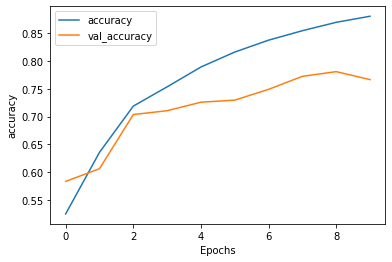

In [18]:
plot_graphs(history=history,metric='accuracy')

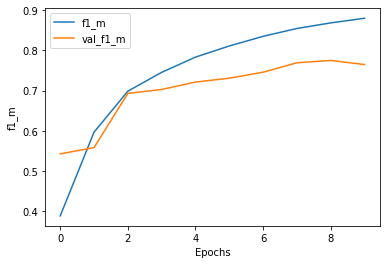

In [19]:
plot_graphs(history=history,metric='f1_m')

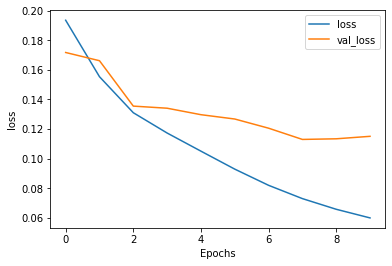

In [20]:
plot_graphs(history=history,metric='loss')

In [37]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_dim=3),
    tf.keras.layers.Dense(3)
])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                40        
                                                                 
 dense_4 (Dense)             (None, 3)                 33        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.predict(x_train[0])

ValueError: in user code:

    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\input_spec.py", line 227, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_15" (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=False
      • mask=None
